# Mall Customer Segmentation

The purpose of this project is to segment customers based on their personal attributes, income information, and spending habits.

As the owner of a fictional mall, I want to segment the customers so that the marketing can create meaningful marketing strategies based on the given customer segments.

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = 'whitegrid', font_scale = 1.2)

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
len(df)

200

In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


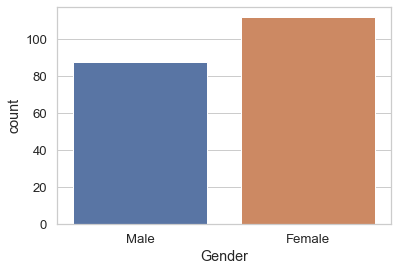

In [8]:
sns.countplot(x = 'Gender', data = df);

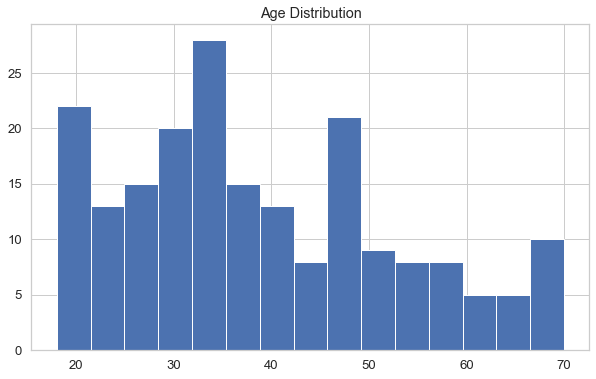

In [9]:
plt.figure(figsize = (10,6))
plt.hist(df['Age'], bins = 15, ec = 'white')
plt.title('Age Distribution');

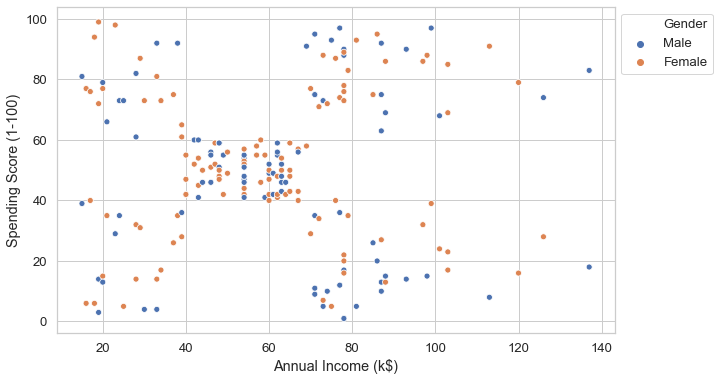

In [10]:
plt.figure(figsize = (10,6))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue = 'Gender', data = df)
plt.legend(bbox_to_anchor=(1, 1), loc=2);

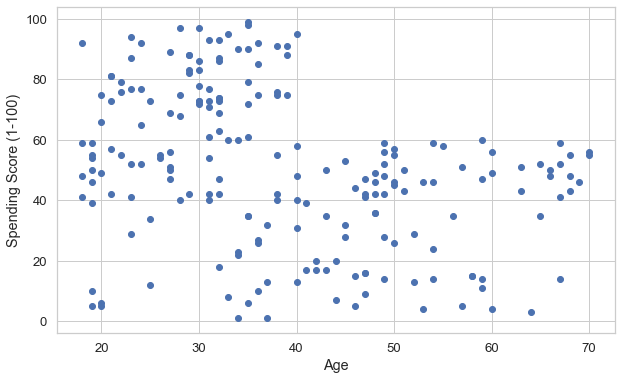

In [11]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(df['Age'], df['Spending Score (1-100)'])
ax.set(xlabel = 'Age', ylabel = 'Spending Score (1-100)');

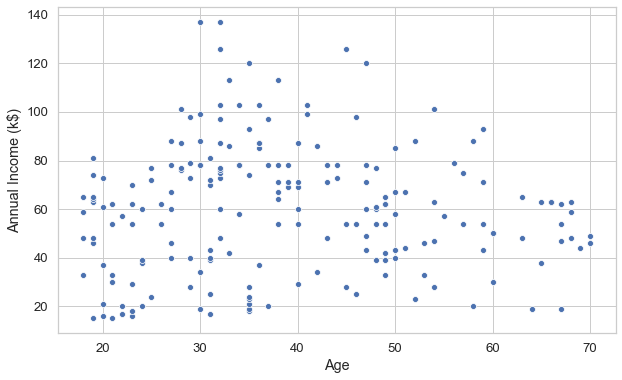

In [12]:
plt.figure(figsize = (10,6))
sns.scatterplot('Age', 'Annual Income (k$)', data = df);

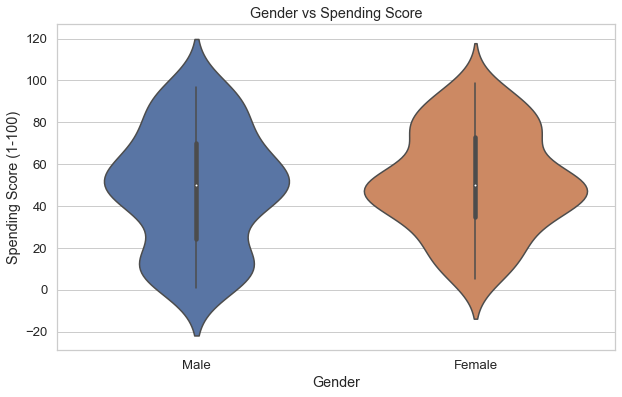

In [13]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'Gender', y = 'Spending Score (1-100)', data = df)
plt.title('Gender vs Spending Score');

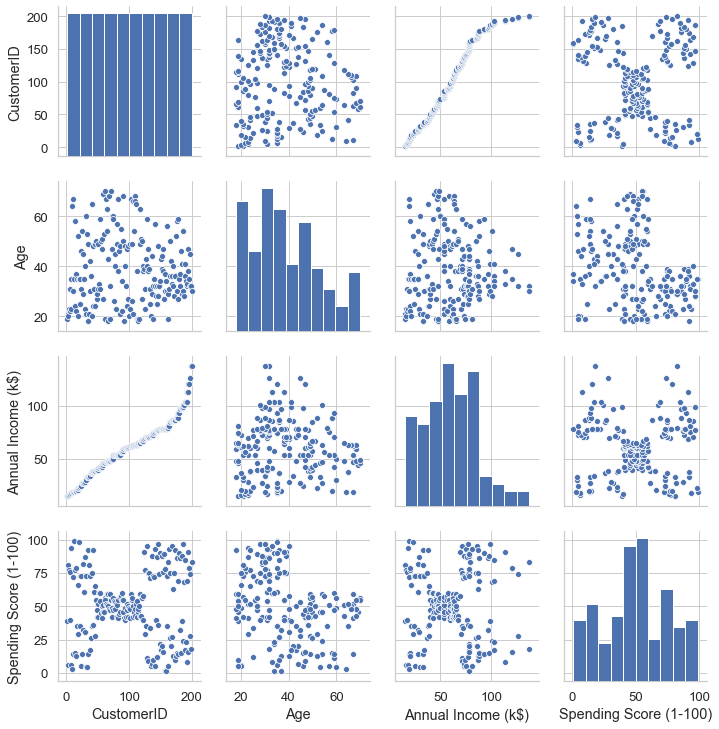

In [14]:
sns.pairplot(df);

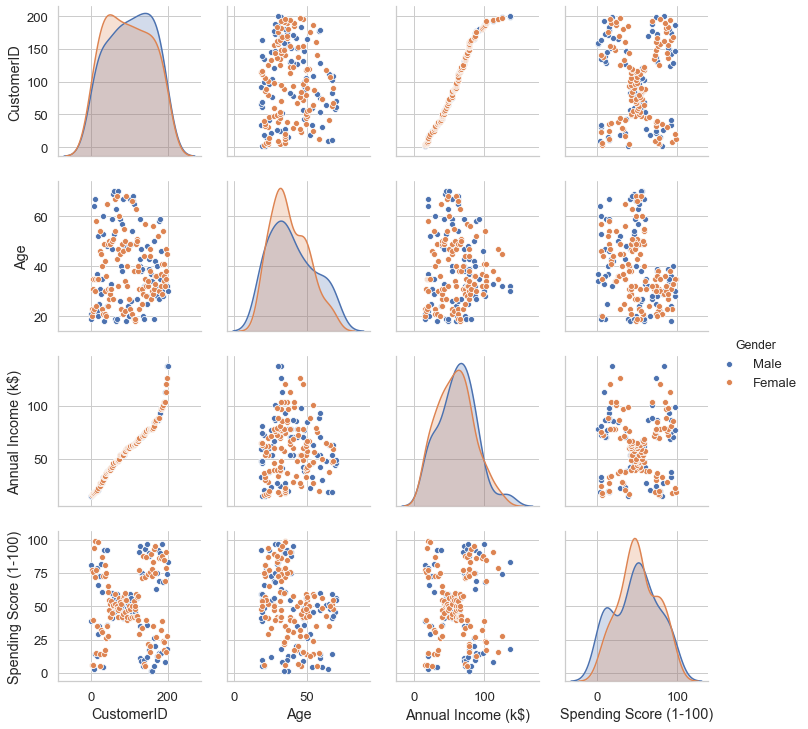

In [15]:
sns.pairplot(df, hue = 'Gender');

In [16]:
from sklearn.cluster import KMeans

In [17]:
x = df.iloc[:,3:].values

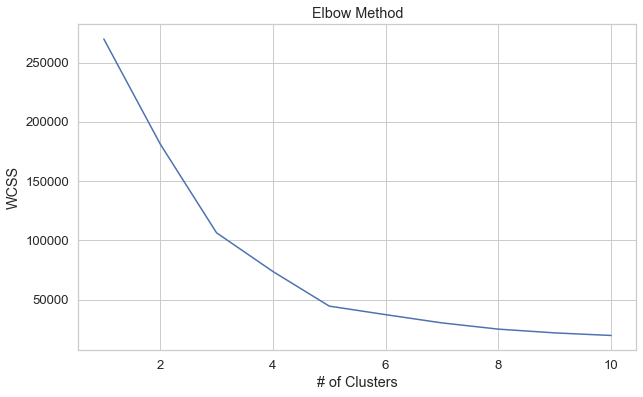

In [18]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(range(1,11), wcss)
ax.set(title = 'Elbow Method', ylabel = 'WCSS', xlabel = '# of Clusters');

In [19]:
km = KMeans(n_clusters = 5, random_state = 0)
y_preds = km.fit_predict(x)

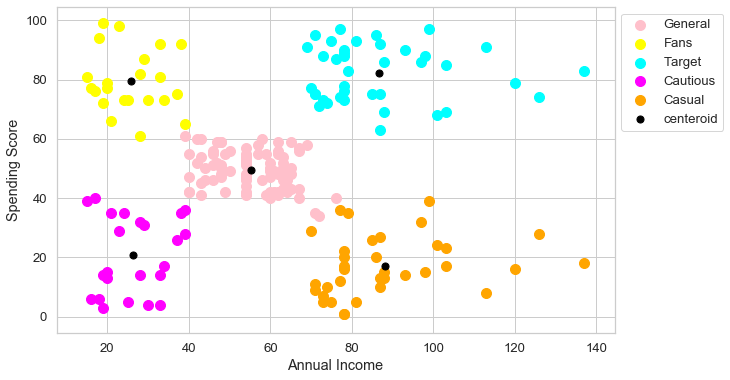

In [20]:
plt.figure(figsize = (10,6))
plt.scatter(x[y_preds == 0, 0], x[y_preds == 0, 1], s = 100, c = 'pink', label = 'General')
plt.scatter(x[y_preds == 1, 0], x[y_preds == 1, 1], s = 100, c = 'yellow', label = 'Fans')
plt.scatter(x[y_preds == 2, 0], x[y_preds == 2, 1], s = 100, c = 'cyan', label = 'Target')
plt.scatter(x[y_preds == 3, 0], x[y_preds == 3, 1], s = 100, c = 'magenta', label = 'Cautious')
plt.scatter(x[y_preds == 4, 0], x[y_preds == 4, 1], s = 100, c = 'orange', label = 'Casual')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

The above scatter plot gives us five different customer segments that we can create marketing strategies for based on their given Annual Income and Spending Score.

In [21]:
age_x = df.iloc[:,[2,4]].values

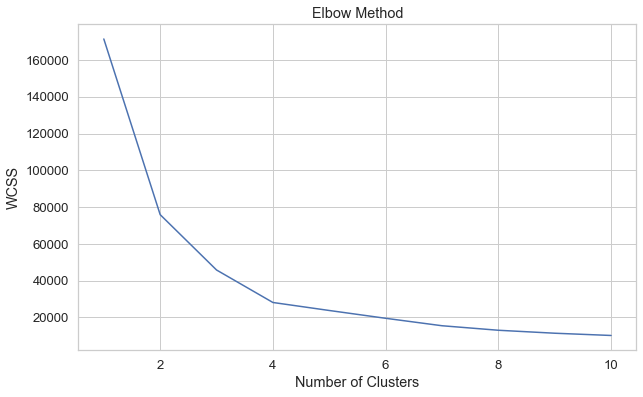

In [22]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(age_x)
    wcss.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(range(1,11), wcss)
ax.set(title = 'Elbow Method', ylabel = 'WCSS', xlabel = 'Number of Clusters');

In [23]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
y_preds = kmeans.fit_predict(age_x)

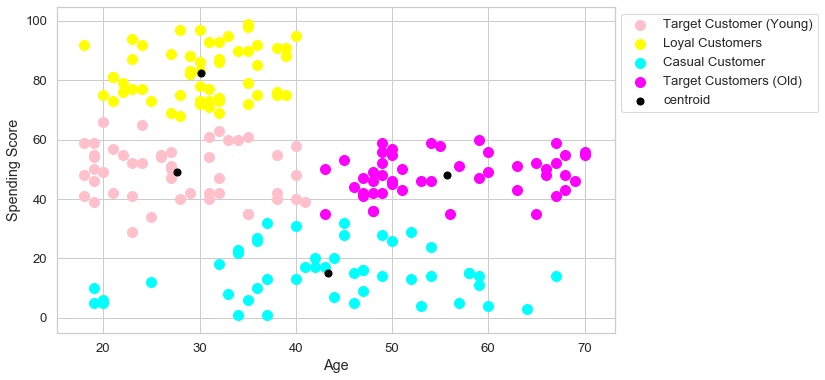

In [24]:
plt.figure(figsize = (10,6))
plt.scatter(age_x[y_preds == 0, 0], age_x[y_preds == 0, 1], s = 100, c = 'pink', label = 'Target Customer (Young)')
plt.scatter(age_x[y_preds == 1, 0], age_x[y_preds == 1, 1], s = 100, c = 'yellow', label = 'Loyal Customers')
plt.scatter(age_x[y_preds == 2, 0], age_x[y_preds == 2, 1], s = 100, c = 'cyan', label = 'Casual Customer')
plt.scatter(age_x[y_preds == 3, 0], age_x[y_preds == 3, 1], s = 100, c = 'magenta', label = 'Target Customers (Old)')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

The above Scatter plot gives us four different customer groups that we can create four different marketing strategies four based on their given Age and Spending Score.